# VGGish transfer learning model



This is a VGGish transfer learning tutorial.<br/>
You can download the VGGish model and pretrained weights on :<br/>https://github.com/tensorflow/models/tree/master/research/audioset/vggish

In [1]:
import numpy as np
np.random.seed(2020)
import os, glob
import tensorflow as tf
import tensorflow
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, BatchNormalization, concatenate, AveragePooling2D, Flatten, Dropout, Dense, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import load_model, Model
tensorflow.compat.v1.set_random_seed(2020)
import soundfile as sf
from useful_functions import *
import tf_slim as slim
import six
import resampy

In [2]:
import vggish_params
import vggish
import preprocess_sound

# Data visualization and making the VGGish features 

VGGish format:<br/> 
    3-D np.array of shape [num_examples, num_frames, num_bands] which represents
    a sequence of examples, <br/>each of which contains a patch of log mel
    spectrogram, <br/>covering num_frames frames of audio and num_bands mel frequency
    bands, <br/>where the frame length is vggish_params.STFT_HOP_LENGTH_SECONDS.<br/>
    <br/>You can either convert from spectrogram or raw audio data. <br/>Here I converted the audio datapoints to the VGGish example data standard.
    
    
    
    

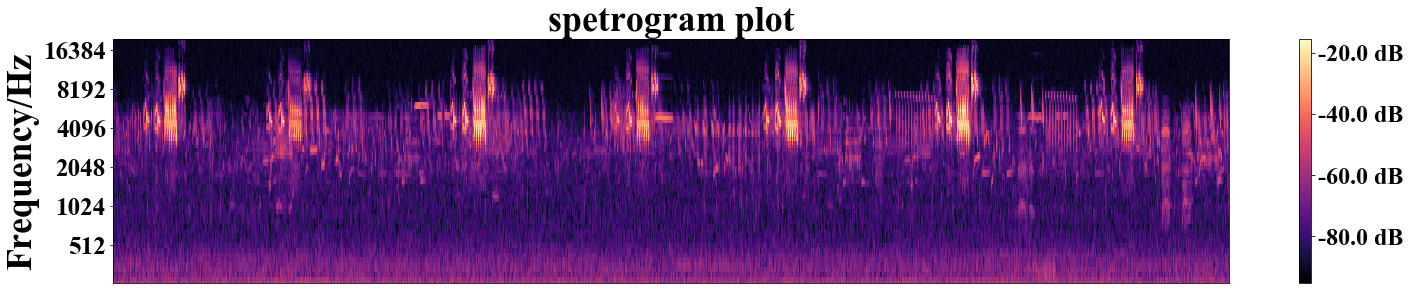

In [3]:
import matplotlib.pyplot as plt
import librosa
n_fft = 1024
hop_length = 512
center = False
n_mels = 64
fmin = 20
fmax = 20000
ref = 1.0
figsize = (25,4.5)
sr = 44100
kwargs = {}
vmin = None
vmax = None
fontsize = 36
titles = ['spetrogram plot']
plt.rcParams.update({'font.family': 'Times New Roman',
                     'font.size': 24}) # Sets font family for entire plot.

x, sr = librosa.load('..\\..\\normalised_audio\\bird_00001.wav', sr = sr)

input_stft = librosa.core.stft(y = x, n_fft = n_fft, hop_length = hop_length, center = center)

# Then, calculate the mel magnitude spectrogram of the STFT'd signal with librosa.feature.melspectrogram.
power_spectrogram = librosa.feature.melspectrogram(S = np.abs(input_stft)**2, sr = sr, n_mels = n_mels, hop_length = hop_length, n_fft = n_fft, fmin = fmin, fmax = fmax)

# Convert the power spectrogram into into units of decibels with librosa.power_to_db.
mel_spectrogram = librosa.power_to_db(power_spectrogram, ref = ref)

# mel_spectrogram is an np.array. We typecast all elements to np.float32 to ensure all output data types match.
mel_spectrogram = mel_spectrogram.astype(np.float32)


## PLOT MEL SPECTROGRAM OF ZEROTH CHANNEL
plt.figure(figsize = figsize) # Sets size of plot.
librosa.display.specshow(mel_spectrogram, sr = sr, hop_length = hop_length, fmin = fmin, fmax = fmax,y_axis = 'mel', **kwargs)
plt.title(titles[0], fontsize = fontsize)         # Set title of figure.
#plt.xlabel('Time/s', fontsize = fontsize)         # Add in x-axis label to graph.
plt.xticks(fontsize = 0.8*fontsize)               # Set font size for x-axis ticks (i.e. the numbers at each grid line).
plt.ylabel('Frequency/Hz', fontsize = fontsize)   # Add in y-axis label to graph.
plt.yticks(fontsize = 0.7*fontsize)               # Set font size for y-axis ticks (i.e. the numbers at each grid line).
plt.colorbar(format='%+3.1f dB')                  # Adds in colour bar (legend) for values in spectrogram.
plt.clim(vmin = vmin,vmax = vmax)                 # Defines the colour bar limits.
plt.show()     

In [4]:
mel_spectrogram = Y[0]
sr = None
n_fft = 102
hop_length = 512
center = False
n_mels = 64
fmin = 20
fmax = 20000
ref = 1.0
titles = ['melspectrogram']
figsize = (20,4)
fontsize = 20
vmin = None
vmax = None

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\eeeds\anaconda3\envs\tf2yg\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-4c911a40e0aa>", line 1, in <module>
    mel_spectrogram = Y[0]
NameError: name 'Y' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\eeeds\anaconda3\envs\tf2yg\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\eeeds\anaconda3\envs\tf2yg\lib\site-packages\IPython\core\ultratb.py", line 1151, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\eeeds\anaconda3

NameError: name 'Y' is not defined

In [ ]:
plot_time_domain_signal_and_track(x)

In [ ]:
mel_spectrogram = Y
plt.figure(figsize = figsize) # Sets size of plot.
librosa.display.specshow(mel_spectrogram, sr = sr, hop_length = hop_length, fmin = fmin, fmax = fmax)
plt.title(titles[0], fontsize = fontsize)         # Set title of figure.
plt.xlabel('Time/s', fontsize = fontsize)         # Add in x-axis label to graph.
plt.xticks(fontsize = 0.7*fontsize)               # Set font size for x-axis ticks (i.e. the numbers at each grid line).
plt.ylabel('Frequency/Hz', fontsize = fontsize)   # Add in y-axis label to graph.
plt.yticks(fontsize = 0.7*fontsize)               # Set font size for y-axis ticks (i.e. the numbers at each grid line).
plt.colorbar(format='%+3.1f dB')                  # Adds in colour bar (legend) for values in spectrogram.
plt.clim(vmin = vmin,vmax = vmax)                 # Defines the colour bar limits.
plt.show()                                        # Display the actual plot on the IPython console.

In [ ]:
#making VGGish features.
vgg_split1=np.zeros((1,2988,64))
for i in range(1,36):
    print(vgg_split1.shape)
    print (i)
    if i==1:
        x,sr=sf.read('..\\..\\normalised_audio\\bird_{:05d}.wav'.format(i))
        exp = preprocess_sound.preprocess_sound(x,sr)
        print(exp.shape)
        exp=exp.reshape(1,2998,64)
        vgg_split1 = exp
       
    else:
        
        vgg_split1 = np.append(vgg_split1,exp,axis=0)




In [ ]:
VGGish_split1=np.zeros((35,2998,64))
for i in range(0,36):
    
    if i==0:
        VGGish_split1 = vgg_split1.reshape(35,2998,64)
       
    else:
        
        VGGish_split1 = np.append(VGGish_split1,vgg_split1,axis=0)
    print(VGGish_split1.shape)

In [ ]:
VGGish_split1.shape

In [ ]:
#making VGGish features.
vgg_split2=np.zeros((1,2998,64))
for i in range(36,71):
  
    if i==36:
        x,sr=sf.read('..\\..\\normalised_audio\\bird_{:05d}.wav'.format(i))
        exp = preprocess_sound.preprocess_sound(x,sr) # x.shape == (1323000,)
        exp=exp.reshape(1,2998,64)
        vgg_split2= exp
       
    else:
        
        vgg_split2= np.append(vgg_split2,exp,axis=0)
    print (i)
    print(vgg_split2.shape)
    

In [ ]:
VGGish_split2=np.zeros((35,2998,64))
for i in range(0,36):
    
    if i==0:
        VGGish_split2 = vgg_split2.reshape(35,2998,64)
       
    else:
        
        VGGish_split2 = np.append(VGGish_split2,vgg_split2,axis=0)
    print(VGGish_split2.shape)

In [ ]:
#making VGGish features.
vgg_split3=np.zeros((1,2998,64))
for i in range(71,101):
  
    if i==71:
        x,sr=sf.read('..\\..\\normalised_audio\\bird_{:05d}.wav'.format(i))
        exp = preprocess_sound.preprocess_sound(x,sr)
        exp=exp.reshape(1,2998,64)
        vgg_split3= exp
       
    else:
        
        vgg_split3= np.append(vgg_split3,exp,axis=0)
    print (i)
    print(vgg_split3.shape)

In [ ]:
VGGish_split3=np.zeros((30,2998,64))
for i in range(0,55):
    
    if i==0:
        VGGish_split3 = vgg_split3.reshape(30,2998,64)
       
    else:
        
        VGGish_split3 = np.append(VGGish_split3,vgg_split3,axis=0)
    print(VGGish_split3.shape)

Save the features to 'features' folder

In [9]:
np.save('..\\..\\features\\VGGish_split1.npy', VGGish_split1, allow_pickle = True)

In [10]:
np.save('..\\..\\features\\VGGish_split2.npy', VGGish_split2, allow_pickle = True)

In [11]:
np.save('..\\..\\features\\VGGish_split3.npy', VGGish_split3, allow_pickle = True)

# Load Features

Firstly,load our own features: spectrograms, psychoparameters and demographics

In [3]:
# LOAD FEATURES
ss1 = np.load('..\\..\\features\\spec_split1.npy', allow_pickle = True)
ps1 = np.load('..\\..\\features\\psych_split1.npy', allow_pickle = True)
ds1 = np.load('..\\..\\features\\demo_split1.npy', allow_pickle = True)
ls1 = np.load('..\\..\\features\\labels_split1.npy', allow_pickle = True)
ss2 = np.load('..\\..\\features\\spec_split2.npy', allow_pickle = True)
ps2 = np.load('..\\..\\features\\psych_split2.npy', allow_pickle = True)
ds2 = np.load('..\\..\\features\\demo_split2.npy', allow_pickle = True)
ls2 = np.load('..\\..\\features\\labels_split2.npy', allow_pickle = True)
ss3 = np.load('..\\..\\features\\spec_split3.npy', allow_pickle = True)
ps3 = np.load('..\\..\\features\\psych_split3.npy', allow_pickle = True)
ds3 = np.load('..\\..\\features\\demo_split3.npy', allow_pickle = True)
ls3 = np.load('..\\..\\features\\labels_split3.npy', allow_pickle = True)

Then, load the VGGish features.

In [4]:
VGGish_split1=np.load('..\\..\\features\\VGGish_split1.npy', allow_pickle = True)
VGGish_split2=np.load('..\\..\\features\\VGGish_split2.npy', allow_pickle = True)
VGGish_split3=np.load('..\\..\\features\\VGGish_split3.npy', allow_pickle = True)

In [5]:
VGGish_split1=VGGish_split1.reshape(1260,2998,64,1)
VGGish_split2=VGGish_split2.reshape(1260,2998,64,1)
VGGish_split3=VGGish_split3.reshape(1650,2998,64,1)

Load the categorical labels as well.

In [6]:
cat_ls1=np.load('../../normalised_labels/cat_ls1.npy',allow_pickle = True)
cat_ls2=np.load('../../normalised_labels/cat_ls2.npy',allow_pickle = True)
cat_ls3=np.load('../../normalised_labels/cat_ls3.npy',allow_pickle = True)

In [7]:
pleasant_ls1,event_ls1=np.split(cat_ls1,2,axis=1)
pleasant_ls2,event_ls2=np.split(cat_ls2,2,axis=1)
pleasant_ls3,event_ls3=np.split(cat_ls3,2,axis=1)

pleasant_ls1=pleasant_ls1.reshape(1260,7)
pleasant_ls2=pleasant_ls2.reshape(1260,7)
pleasant_ls3=pleasant_ls3.reshape(1650,7)

In [8]:
## TRIAL: USE SPLIT 2 FOR VALIDATION AND 2/3 FOR TRAINING
train_specs = np.concatenate((ss1,ss3))
train_demos = np.concatenate((ds1,ds3))
train_psychs = np.concatenate((ps1,ps3))
train_labels = np.concatenate((pleasant_ls1,pleasant_ls3))
train_VGGish=np.concatenate((VGGish_split1,VGGish_split3))
eval_VGGish=VGGish_split2
eval_specs = ss2
eval_demos = ds2
eval_psychs = ps2
eval_labels = pleasant_ls2

# Build model

Use the VGGish model architecture as a base model and add some simple top layers on top of it.<br/>
With the pre-trained weights being loaded, we can choose to set the model to be trainable or not by base_model.trainable = True/False<br/>


In [9]:

base_model =vggish.VGGish(load_weights=True,
                  weights='audioset',
                  include_top=False,
                  input_shape=(2998,64,1),
                  out_dim=None,
                  pooling='avg'
                    )
#base_model.trainable = True
base_model.compile(loss = 'categorical_crossentropy', 
              optimizer = keras.optimizers.Adam(lr = 0.0001)) 


base_model.summary()

Model: "VGGish"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2998, 64, 1)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 2998, 64, 64)      640       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 1499, 32, 64)      0         
_________________________________________________________________
conv2 (Conv2D)               (None, 1499, 32, 128)     73856     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 750, 16, 128)      0         
_________________________________________________________________
conv3/conv3_1 (Conv2D)       (None, 750, 16, 256)      295168    
_________________________________________________________________
conv3/conv3_2 (Conv2D)       (None, 750, 16, 256)      59008

**Overall model:**<br/>
spectrograms, demographics and psychoparamters are input in 3 seperate branches, and then concatenate together to an output dense layer

In [10]:
#Model 1: VGGish model non-trainable
#Model 3: VGGish model trainable
spec_input = keras.Input(shape=(2998,64, 1))
base_model.trainable = False
S = base_model(spec_input, training=True)

demo_input = Input(shape = (13,))
# D = Dropout(0.5)(demo_input)
D = Dense(20, kernel_regularizer = keras.regularizers.l2(0.001))(demo_input)
D = BatchNormalization()(D)
D = Activation('relu')(D)

psych_input = Input(shape = (72,))
# P = Dropout(0.5)(psych_input)
P = Dense(20, kernel_regularizer = keras.regularizers.l2(0.001))(psych_input)
P = BatchNormalization()(P)
P = Activation('relu')(P)

C = concatenate([S, D, P])
#C = Dropout(0.5)(C)
C = Dense(20, kernel_regularizer = keras.regularizers.l2(0.001))(C)
C = BatchNormalization()(C)
C = Activation('relu')(C)

output = Dense(7, activation='softmax')(C) 

model = keras.Model(inputs=[spec_input, demo_input, psych_input], outputs=output,name='transfer-learning_model1')


#model = keras.Model(inputs, outputs)

model.compile(loss = 'categorical_crossentropy', 
              optimizer = keras.optimizers.Adam(lr = 0.0001))

model.summary()

Model: "transfer-learning_model1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 72)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 20)           280         input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 20)           1460        input_3[0][0]                    
___________________________________________________________________________

In [ ]:
#Model2: VGGish with large dense model

spec_input = keras.Input(shape=(64, 2582, 1))
base_model.trainable=False
S = base_model(spec_input, training=False)

demo_input = Input(shape = (13,))
# D = Dropout(0.5)(demo_input)
D = Dense(100, kernel_regularizer = keras.regularizers.l2(0.001))(demo_input)
D = Dense(20)(D)
D = BatchNormalization()(D)
D = Activation('relu')(D)

psych_input = Input(shape = (72,))
# P = Dropout(0.5)(psych_input)
P = Dense(100, kernel_regularizer = keras.regularizers.l2(0.001))(psych_input)
P = Dense(20)(P)
P = BatchNormalization()(P)
P = Activation('relu')(P)

C = concatenate([S, D, P])
#C = Dropout(0.5)(C)
C = Dense(50, kernel_regularizer = keras.regularizers.l2(0.001))(C)
C = Dense(20, kernel_regularizer = keras.regularizers.l2(0.001))(C)
C = BatchNormalization()(C)
C = Activation('relu')(C)

output = Dense(7, activation='softmax')(C) 

model = keras.Model(inputs=[spec_input, demo_input, psych_input], outputs=output,name='transfer-learning_model2')


#model = keras.Model(inputs, outputs)

model.compile(loss = 'categorical_crossentropy', 
              optimizer = keras.optimizers.Adam(lr = 0.0001))

model.summary()


In [11]:
model_path = '..\\models\\'
prefix = 'test_model_'
if not os.path.exists(model_path):
    #os.makedirs(model_path)
if not os.path.exists(model_path + os.sep + 'vggish_transfer'):
    #os.makedirs(model_path + os.sep + 'vggish_transfer')
if not os.path.exists(model_path + os.sep +'vggish_transfer'+ os.sep + 'model2_split2'):
    #os.makedirs(model_path + os.sep +'vggish_transfer'+ os.sep + 'model2_split2')

## DEFINE CALLBACKS
filepath = model_path + os.sep + 'vggish_transfer' + os.sep + 'model2_split2'+ os.sep + prefix + 'epoch-{epoch:03d}-acc.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor = 'val_loss', verbose = 0, save_best_only = True)
callbacks_list = [checkpoint]

## FIT MODEL
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(lr = 0.0001))
model_hist = model.fit([train_VGGish,train_demos,train_psychs],
                       train_labels,
                       epochs = 200,
                       initial_epoch = 0, 
                       verbose = 1,
                       validation_data=([eval_VGGish,eval_demos,eval_psychs],eval_labels),
                       callbacks = callbacks_list,
                       shuffle = True)

Epoch 1/200
91/91 [==============================] - 18s 192ms/step - loss: 2.3109 - val_loss: 2.2329
Epoch 2/200
91/91 [==============================] - 14s 157ms/step - loss: 2.2088 - val_loss: 2.1801
Epoch 3/200
91/91 [==============================] - 14s 158ms/step - loss: 2.1156 - val_loss: 2.1845
Epoch 4/200
91/91 [==============================] - 14s 158ms/step - loss: 2.0504 - val_loss: 2.1826
Epoch 5/200
91/91 [==============================] - 14s 159ms/step - loss: 2.0112 - val_loss: 2.1646
Epoch 6/200
91/91 [==============================] - 15s 161ms/step - loss: 1.9581 - val_loss: 2.1441
Epoch 7/200
91/91 [==============================] - 15s 161ms/step - loss: 1.9349 - val_loss: 2.1148
Epoch 8/200
91/91 [==============================] - 14s 157ms/step - loss: 1.8955 - val_loss: 2.0862
Epoch 9/200
91/91 [==============================] - 14s 157ms/step - loss: 1.8732 - val_loss: 2.0631
Epoch 10/200
91/91 [==============================] - 14s 157ms/step - loss: 1.855

#Model Evaluation

In [35]:
prediction= vgg_model.predict([eval_specs,eval_demos,eval_psychs])
gt = np.argmax(pleasant_ls1,axis=1)
test = np.argmax(prediction,axis=1)
accuracy = np.sum(gt==test)/1260

In [ ]:
model_name=glob.glob('../../models/vggish_transfer/model1_split2/*.h5')
for models in model_name:
    
    vgg_model=keras.models.load_model(models)
    vgg_model.evaluate([eval_specs,eval_demos,eval_psychs],eval_labels,batch_size=32)


Validation split 1:<br/>
model1(non-trainable):<br/> epoch-049: Validation loss:1.7745 accuracy:0.29285714285714287<br/>
model2(large top dense layer):<br/>epoch-037 Validation loss: 1.9329 accuracy:0.2714285714285714<br/>
model3(trainable):<br/>epoch-044(best):Validation loss:1.8263 accuracy:0.2627<br/>

Validation split 2:<br/>
model1(non-trainable):<br/>epoch-200:Validation loss:1.8728 accuracy:0.20476190476190476<br/>
model2(large top dense layer):<br/>epoch-037 Validation loss: 1.9001 accuracy:0.2849206349206349<br/>
model3(trainable):<br/>epoch(best):Validation loss: 1.8378 accuracy:0.24365079365079365<br/>